<a href="https://colab.research.google.com/github/Edson-silva96/An-lise-e-Previs-o-de-Renda-com-base-em-Dados-Demogr-ficos/blob/main/Analise_e_Previsao_de_Renda_com_base_em_Dados_Demograficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [89]:
data = pd.read_csv('census.csv')
validade = data['education'].unique()
dv = data['relationship'].unique()
data

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<Axes: ylabel='income'>

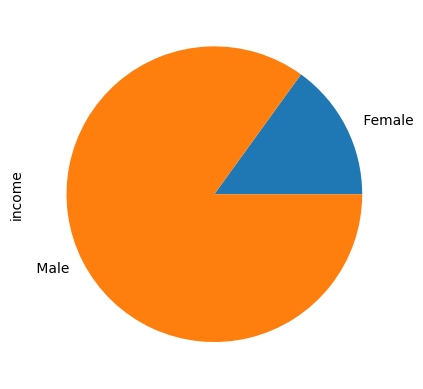

In [90]:
df = data[data['income'] == ' >50K']
agrupado = df.groupby(['sex'])['income'].count()
agrupado.plot.pie()

<Axes: ylabel='income'>

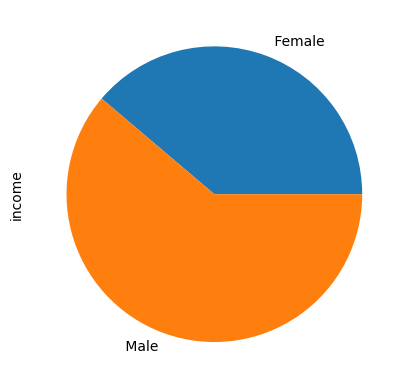

In [91]:
df1 = data[data['income'] == ' <=50K']
agrupado1 = df1.groupby(['sex'])['income'].count()
agrupado1.plot.pie()

In [92]:
dm = data['occupation'].unique()
dm

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [93]:
pes1 = data[data['income'] == ' <=50K']
print(len(pes1))
print(len(pes1)/len(data))

24720
0.7591904425539756


quantidade e porcentagem de pessoas que ganhar acima de 50 mil
total de pessoas que ganhar abaixo de 50 mil e 24720 pessoas em 32561 pessoas fornecida pela base de dados
isso representa 75,91% de toda a base de dados

In [94]:
pes2 = data[data['income'] == ' >50K']
print(len(pes2))
print(len(pes2)/len(data))

7841
0.2408095574460244


quantidade e porcentagem de pessoas que ganhar acima de 50 mil total de pessoas que ganhar acima de 50 mil e 7891 pessoas em 32561 pessoas fornecida pela base de dados isso representa 24,08% de toda a base de dados

In [95]:
valida = []
total = []
valida_2 = []
total_2 = []

for i in validade:
  df_1 = data[(data['education'] == f'{i}') & (data['income'] == ' >50K')]
  valida.append(len(df_1))
  total.append(len(df_1)/len(data))

for i in validade:
  df_2 = data[(data['education'] == f'{i}') & (data['income'] == ' <=50K')]
  valida_2.append(len(df_2))
  total_2.append(len(df_2)/len(data))

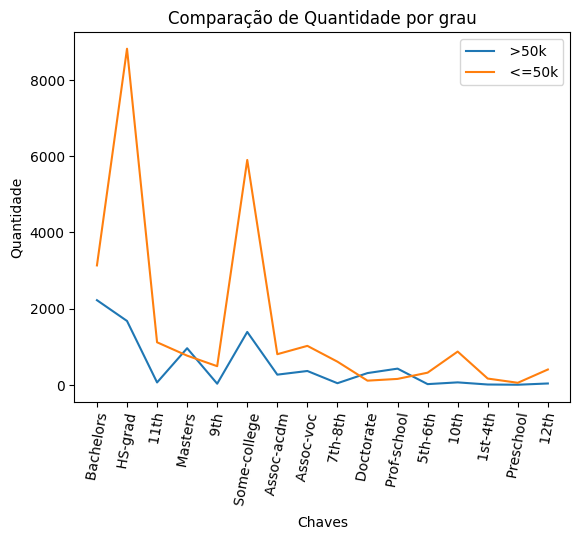

In [96]:
dados = {'chaves':validade,
         'porcentagem_>50k': total,
         'quantidade_>50k': valida,
         'porcentagem_<=50k':total_2,
         'quantidade_<=50k':valida_2}

dados = pd.DataFrame(dados)
# Criando o gráfico de linhas
plt.plot(dados['chaves'], dados['quantidade_>50k'], label=' >50k')
plt.plot(dados['chaves'], dados['quantidade_<=50k'], label=' <=50k')

# Personalizando o gráfico
plt.xlabel('Chaves')
plt.ylabel('Quantidade')
plt.title('Comparação de Quantidade por grau')
plt.legend()
plt.xticks(rotation=80)

# Exibindo o gráfico
plt.show()

In [97]:
valida = []
total = []
valida_2 = []
total_2 = []

for i in dv:
  df_1 = data[(data['relationship'] == f'{i}') & (data['income'] == ' >50K')]
  valida.append(len(df_1))
  total.append(len(df_1)/len(data))

for i in dv:
  df_2 = data[(data['relationship'] == f'{i}') & (data['income'] == ' <=50K')]
  valida_2.append(len(df_2))
  total_2.append(len(df_2)/len(data))

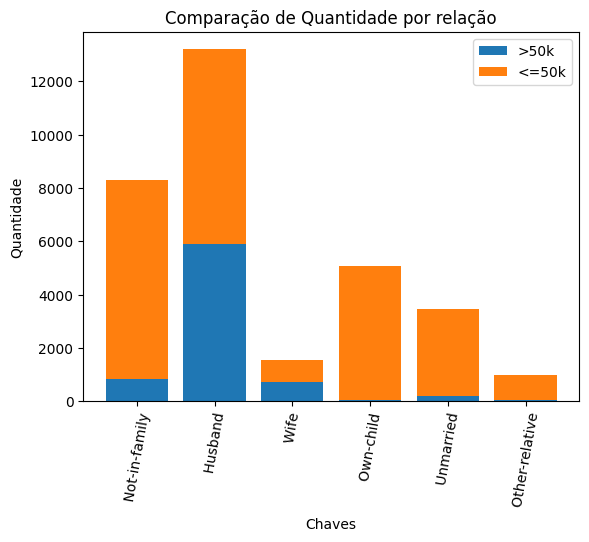

In [98]:
dados = {'chaves':dv,
         'porcentagem_>50k': total,
         'quantidade_>50k': valida,
         'porcentagem_<=50k':total_2,
         'quantidade_<=50k':valida_2}

dados = pd.DataFrame(dados)
# Criando o gráfico de linhas
# Criando o gráfico de barras
plt.bar(dados['chaves'], dados['quantidade_>50k'], label='>50k')
plt.bar(dados['chaves'], dados['quantidade_<=50k'], label='<=50k', bottom=dados['quantidade_>50k'])

# Personalizando o gráfico
plt.xlabel('Chaves')
plt.ylabel('Quantidade')
plt.title('Comparação de Quantidade por relação')
plt.legend()
plt.xticks(rotation=80)

# Exibindo o gráfico
plt.show()

In [99]:
valida = []
total = []
valida_2 = []
total_2 = []

for i in dm:
  df_1 = data[(data['occupation'] == f'{i}') & (data['income'] == ' >50K')]
  valida.append(len(df_1))
  total.append(len(df_1)/len(data))

for i in dm:
  df_2 = data[(data['occupation'] == f'{i}') & (data['income'] == ' <=50K')]
  valida_2.append(len(df_2))
  total_2.append(len(df_2)/len(data))

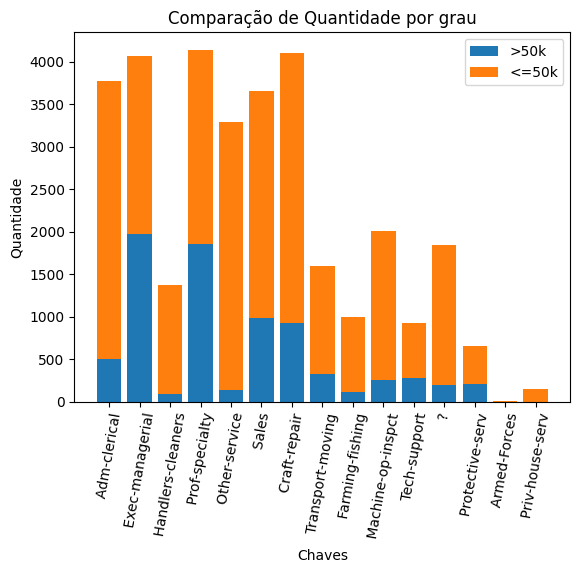

In [100]:
dados = {'chaves':dm,
         'porcentagem_>50k': total,
         'quantidade_>50k': valida,
         'porcentagem_<=50k':total_2,
         'quantidade_<=50k':valida_2}

dados = pd.DataFrame(dados)
# Criando o gráfico de linhas
# Criando o gráfico de barras
plt.bar(dados['chaves'], dados['quantidade_>50k'], label='>50k')
plt.bar(dados['chaves'], dados['quantidade_<=50k'], label='<=50k', bottom=dados['quantidade_>50k'])

# Personalizando o gráfico
plt.xlabel('Chaves')
plt.ylabel('Quantidade')
plt.title('Comparação de Quantidade por grau')
plt.legend()
plt.xticks(rotation=80)

# Exibindo o gráfico
plt.show()

In [101]:
data.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [102]:
data.nunique()

,0
age,73
workclass,9
final-weight,21648
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [103]:
# removendo colunas com alta taxas de carnilidades
df = ['final-weight','capital-gain','capital-gain','capital-loos','native-country']

df1 = data.drop(df, axis=1)
df1.shape

(32561, 11)

In [104]:
treino = df1[0:32558:1]
teste = df1[32558:32561:1]

In [105]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32558 entries, 0 to 32557
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32558 non-null  int64 
 1   workclass       32558 non-null  object
 2   education       32558 non-null  object
 3   education-num   32558 non-null  int64 
 4   marital-status  32558 non-null  object
 5   occupation      32558 non-null  object
 6   relationship    32558 non-null  object
 7   race            32558 non-null  object
 8   sex             32558 non-null  object
 9   hour-per-week   32558 non-null  int64 
 10  income          32558 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [106]:
from sklearn.preprocessing import LabelEncoder

label_enco = LabelEncoder()


x = treino.iloc[:,0:10].values
y = treino.iloc[:,10].values

x[:,1] = label_enco.fit_transform(x[:,1])
x[:,2] = label_enco.fit_transform(x[:,2])
x[:,4] = label_enco.fit_transform(x[:,4])
x[:,5] = label_enco.fit_transform(x[:,5])
x[:,6] = label_enco.fit_transform(x[:,6])
x[:,7] = label_enco.fit_transform(x[:,7])
x[:,8] = label_enco.fit_transform(x[:,8])


y = label_enco.fit_transform(y)

In [107]:
X = x
y = y
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
modelo = LogisticRegression() # Criando uma instância do modelo de Regressão Logística
modelo.fit(X_train, y_train) # Treinando o modelo com os dados de treinamento

In [109]:
previsoes = modelo.predict(X_test) # Fazendo previsões com os dados de teste
acuracia = accuracy_score(y_test, previsoes) # Calculando a acurácia do modelo
print(f"Acurácia do modelo: {acuracia}")

Acurácia do modelo: 0.8077395577395577


In [110]:
recall = recall_score(y_test, previsoes)
print(f"recall do modelo: {recall}")

recall do modelo: 0.4332901554404145


In [111]:
precisao = precision_score(y_test, previsoes)
print(f"precisao do modelo: {precisao}")

precisao do modelo: 0.6395793499043977


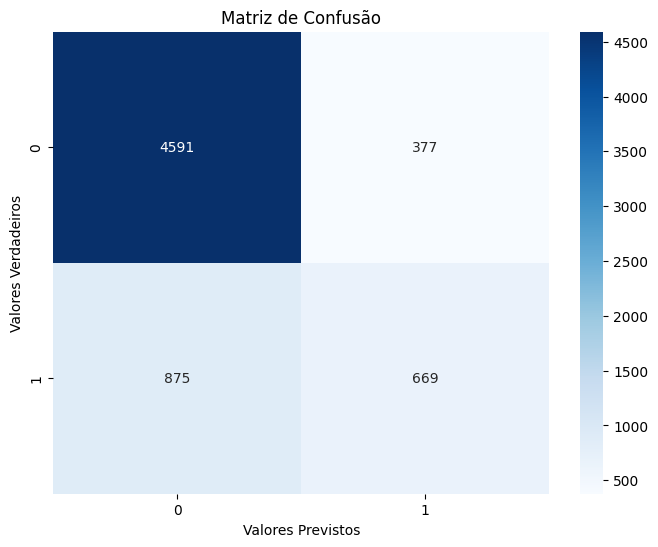

In [112]:
cm = confusion_matrix(y_test, previsoes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Valores Previstos")
plt.ylabel("Valores Verdadeiros")
plt.title("Matriz de Confusão")
plt.show()

In [83]:
teste = teste.iloc[:,0:10].values

teste[:,1] = label_enco.fit_transform(teste[:,1])
teste[:,2] = label_enco.fit_transform(teste[:,2])
teste[:,4] = label_enco.fit_transform(teste[:,4])
teste[:,5] = label_enco.fit_transform(teste[:,5])
teste[:,6] = label_enco.fit_transform(teste[:,6])
teste[:,7] = label_enco.fit_transform(teste[:,7])
teste[:,8] = label_enco.fit_transform(teste[:,8])

In [ ]:
teste

In [84]:
nova_previsao = modelo.predict(teste)
nova_previsao

array([0, 0, 0])